In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sample_donations.csv')
df.head()

,donor_id,donation_amount,campaign,donation_date
0,1070.0,140.63,Holiday Giving,2024-06-11
1,1083.0,145.51,Memorial Tribute,2024-08-11
2,1030.0,38.88,Holiday Giving,2024-01-04
3,1071.0,164.04,Holiday Giving,2024-04-04
4,1074.0,142.75,Holiday Giving,2024-09-14


In [3]:
df.describe()

,donor_id,donation_amount
count,290.000000,280.000000
mean,1050.703448,79.832679
std,29.174840,79.726406
min,1001.000000,0.390000
25%,1025.000000,22.665000
50%,1050.500000,52.005000
75%,1076.000000,102.217500
max,1100.000000,412.830000


<Axes: >

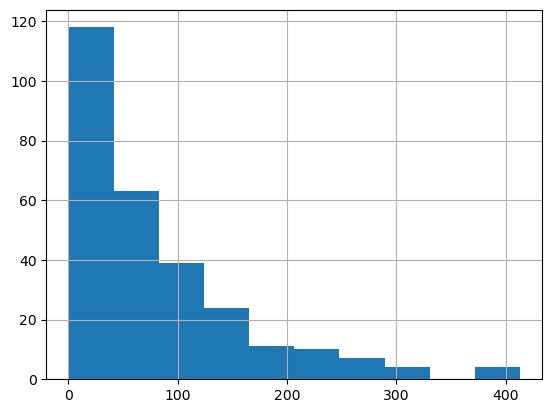

In [4]:
df['donation_amount'].hist()

In [5]:
# --- Q1: How many donations have missing donor_id or donation_amount?
missing_values = df[['donor_id', 'donation_amount']].isnull().sum()
print("Q1. Missing values:")
print(missing_values)

Q1. Missing values:
donor_id           10
donation_amount    20
dtype: int64


In [6]:
# --- Q2: Unique donors after dropping rows with missing donor_id
df_cleaned = df.dropna(subset=['donor_id'])
unique_donors = df_cleaned['donor_id'].nunique()
print("\nQ2. Number of unique donors:", unique_donors)


Q2. Number of unique donors: 96


In [7]:
# --- Q3: Top 3 campaigns by total donation amount
top_campaigns = df_cleaned.groupby('campaign')['donation_amount'].sum().sort_values(ascending=False).head(3)
print("\nQ3. Top 3 campaigns by total donations:")
print(top_campaigns)


Q3. Top 3 campaigns by total donations:
campaign
Holiday Giving      5427.53
Cancer Walk 2024    4868.00
Memorial Tribute    4473.32
Name: donation_amount, dtype: float64


In [8]:
# --- Q4: Average donation per donor
avg_donation_per_donor = df_cleaned.groupby('donor_id')['donation_amount'].mean().sort_values(ascending=False).head(5)  # showing top 5
print("\nQ4. Average donation per donor (sample of top 5):")
print(avg_donation_per_donor)


Q4. Average donation per donor (sample of top 5):
donor_id
1031.0    285.920000
1089.0    216.520000
1041.0    205.863333
1026.0    184.886667
1086.0    177.740000
Name: donation_amount, dtype: float64


In [9]:
df_cleaned['donation_date'] = pd.to_datetime(df_cleaned['donation_date'])

/var/folders/b9/t_xztj7s7lz_yqqql63b2lnr0000gn/T/ipykernel_15217/3537689933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['donation_date'] = pd.to_datetime(df_cleaned['donation_date'])


In [10]:
# --- Q5: Number of donations made in December
december_donations = df_cleaned[df_cleaned['donation_date'].dt.month == 12]
print("\nQ5. Number of December donations:", len(december_donations))


Q5. Number of December donations: 20


In [11]:
# --- Q6: Donors who gave in December but not before September
dec_donors = december_donations['donor_id'].unique()
early_donors = df_cleaned[df_cleaned['donation_date'].dt.month < 9]['donor_id'].unique()
target_donors = set(dec_donors) - set(early_donors)
print("\nQ6. Sample of donors who donated in December but not before September:")
print(list(target_donors)[:5])  # print only a sample


Q6. Sample of donors who donated in December but not before September:
[1025.0]


In [12]:
# --- Q7: Export donor-level summary to CSV
donor_summary = df_cleaned.groupby('donor_id')['donation_amount'].agg(
    total_donated='sum',
    avg_donation='mean',
    donation_count='count'
).reset_index()

donor_summary.to_csv("donor_summary.csv", index=False)
print("\nQ7. Donor summary exported to 'donor_summary.csv'")


Q7. Donor summary exported to 'donor_summary.csv'


In [13]:
## Visualizations

In [31]:
import seaborn as sns

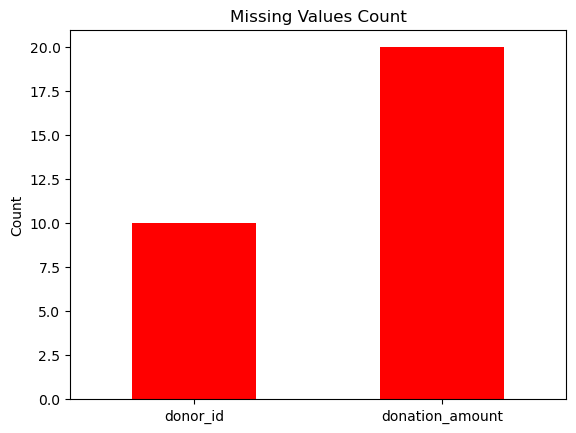

In [15]:
# 1. 🔴 Missing Values Count (Bar Plot)
missing_counts = df[['donor_id', 'donation_amount']].isnull().sum()
missing_counts.plot(kind='bar', color='red', title="Missing Values Count")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

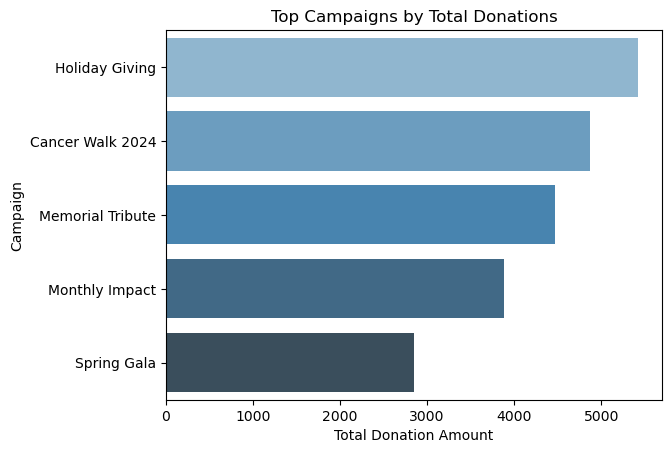

In [16]:
# 2. 📦 Top Campaigns by Total Donations (Bar Plot)
campaign_totals = df_cleaned.groupby("campaign")["donation_amount"].sum().sort_values(ascending=False)
sns.barplot(x=campaign_totals.values, y=campaign_totals.index, palette="Blues_d")
plt.title("Top Campaigns by Total Donations")
plt.xlabel("Total Donation Amount")
plt.ylabel("Campaign")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


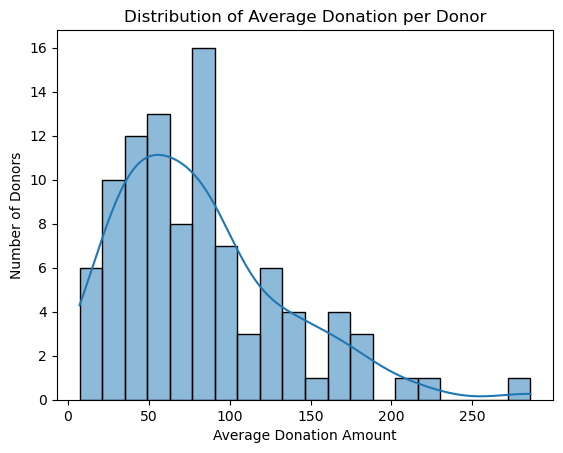

In [17]:
# 3. 📈 Average Donation per Donor (Histogram)
avg_donation = df_cleaned.groupby("donor_id")["donation_amount"].mean()
sns.histplot(avg_donation, kde=True, bins=20)
plt.title("Distribution of Average Donation per Donor")
plt.xlabel("Average Donation Amount")
plt.ylabel("Number of Donors")
plt.show()

/var/folders/b9/t_xztj7s7lz_yqqql63b2lnr0000gn/T/ipykernel_15217/3316188450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month'] = df_cleaned['donation_date'].dt.to_period('M')


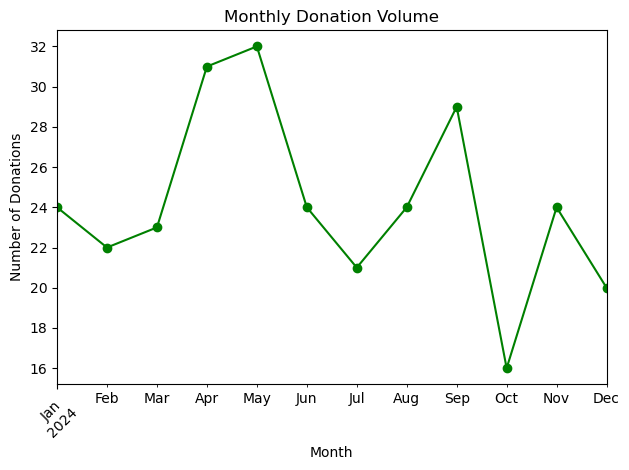

In [18]:
# 4. 📅 Monthly Donation Count (Line Plot)
df_cleaned['month'] = df_cleaned['donation_date'].dt.to_period('M')
monthly_counts = df_cleaned.groupby('month').size()
monthly_counts.plot(kind='line', marker='o', title="Monthly Donation Volume", color='green')
plt.xlabel("Month")
plt.ylabel("Number of Donations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/b9/t_xztj7s7lz_yqqql63b2lnr0000gn/T/ipykernel_15217/3242074939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month'] = df_cleaned['donation_date'].dt.to_period('M')


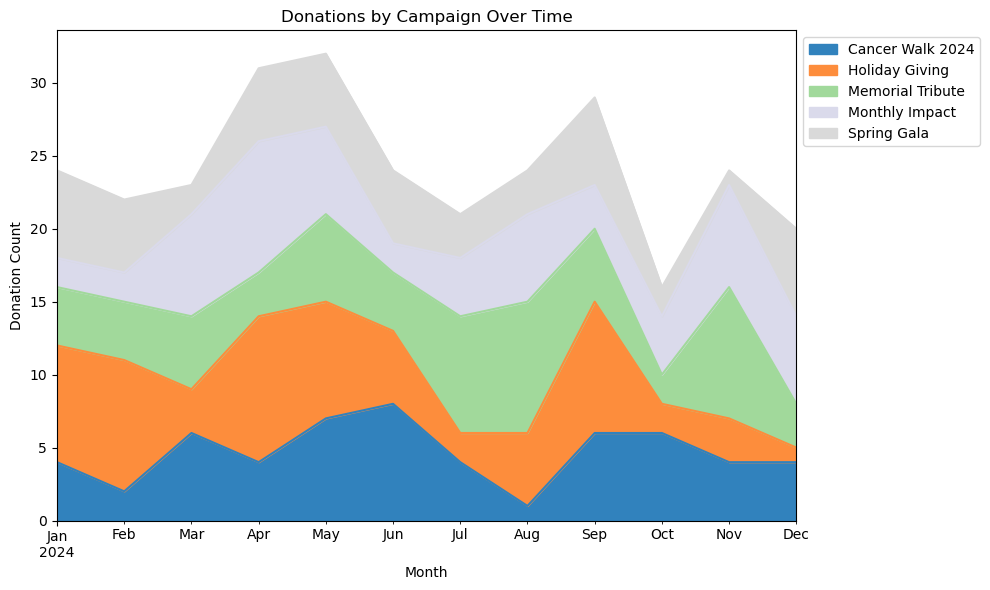

In [19]:
# 5. 🔄 Donations by Campaign Over Time (Stacked Area Plot)
df_cleaned['month'] = df_cleaned['donation_date'].dt.to_period('M')
monthly_campaigns = df_cleaned.groupby(['month', 'campaign']).size().unstack(fill_value=0)
monthly_campaigns.plot(kind='area', stacked=True, figsize=(10, 6), colormap="tab20c")
plt.title("Donations by Campaign Over Time")
plt.xlabel("Month")
plt.ylabel("Donation Count")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [32]:
## ✅ Clustering Donors Using K-Means

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option

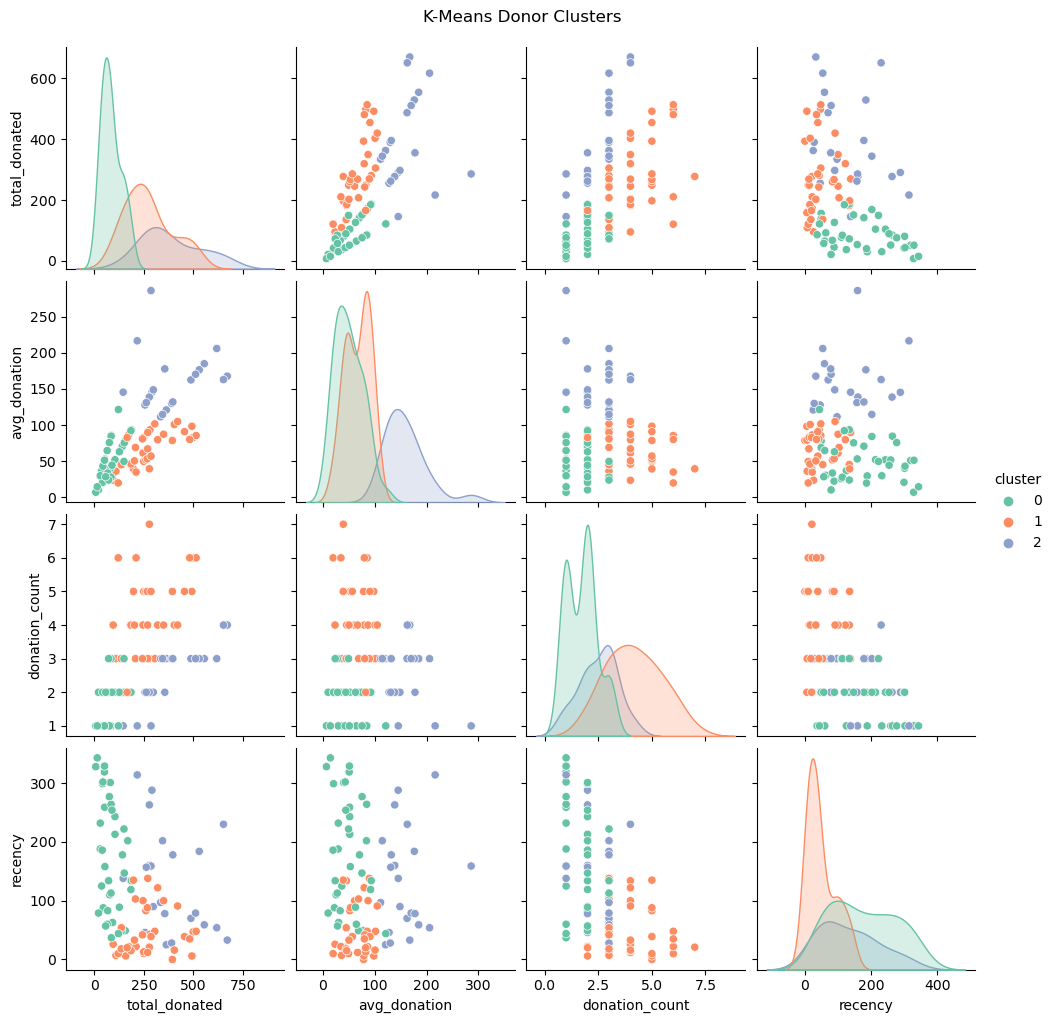

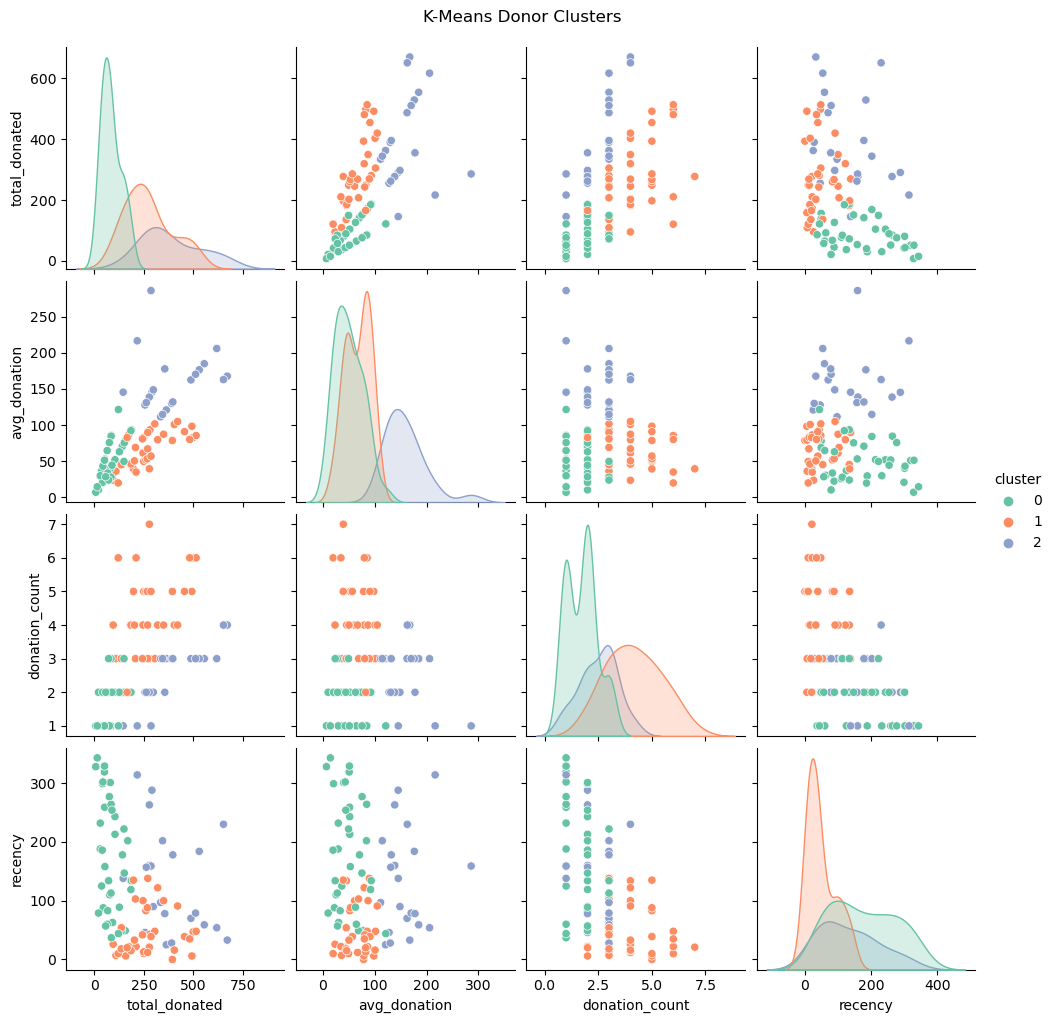

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# RFM-like features
rfm = df_cleaned.groupby('donor_id').agg(
    total_donated=('donation_amount', 'sum'),
    avg_donation=('donation_amount', 'mean'),
    donation_count=('donation_amount', 'count'),
    recency=('donation_date', lambda x: (df_cleaned['donation_date'].max() - x.max()).days)
).reset_index()

# Normalize
features = ['total_donated', 'avg_donation', 'donation_count', 'recency']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rfm[features])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
sns.pairplot(rfm, hue='cluster', vars=features, palette='Set2')
plt.suptitle("K-Means Donor Clusters", y=1.02)
plt.show()